*******************************************************************************************************
# Построение программных датчиков последовательностей случайных чисел с заданными законами распределения.
*******************************************************************************************************

### Генератор последовательности равномерно распределенных случайных чисел на основе алгоритма Лемера.

In [68]:
class Lehmer:
    """ R[n] = factor * R[n-1] % module, n > 1
    """

    def __init__(self, factor=134775813, module=134775811, seed=1):
        """ Initialize Lehmer generaor.
        """

        self.__factor = factor

        if not module > 0:
            raise AttributeError("Module must be greater than zero 0")
        self.__module = module

        self.__current_state = seed

    @property
    def factor(self):
        return self.__factor

    @property
    def module(self):
        return self.__module

    @property
    def current_state(self):
        return self.__current_state
    
    def generator(self):
        """ Get Lehmer generator.
        """
        
        while True:
            number = self.factor * self.current_state % self.module
            yield number / self.module
            self.__current_state = number
    
    def __call__(self, *args, **kwargs):
        """ Get rundom number.
        """

        number = self.factor * self.current_state % self.module
        self.__current_state = number
        return number / self.module
            

### Вспомогательные функции.

In [69]:
%matplotlib inline 

from typing import Sequence
import matplotlib.pyplot as plt
from numpy import histogram
import numpy as np
from matplotlib.pyplot import bar, show
from matplotlib.pyplot import title as set_title
from math import sqrt
import pandas as pd
import math
from collections import OrderedDict


def print_histogram(numbers):
    """ Show histogram.
    """
    
    plt.hist(numbers, state.intervals, facecolor='blue')

    plt.xlabel('Values')
    plt.ylabel('Number of values')
    plt.title('Histogram')

    plt.grid(True)

    plt.show()


def calculate_and_show_table(numbers):
    """ Show table with some info about Lehmer generator.
    """

    data = OrderedDict()

    expected_value = calculate_expected_value(numbers)
    variance = calculate_variance(numbers)

    data["Expected value"] = expected_value
    data["Variance"] = variance
    data["Standard deviation"] = math.sqrt(variance)
    data["Period"] = period
    
    data = pd.Series(data)

    print(pd.DataFrame(data))

    
def normalize(hist: Sequence, n: int) -> tuple:
    return tuple(map(lambda x: x/n, hist))


def calculate_expected_value(numbers):
    """  Calculates expected values of list of numbers
    """
    
    return np.mean(numbers)


def calculate_variance(numbers):
    """  Calculates variance of list of numbers.
    """
    
    expected_value = calculate_expected_value(numbers)
    return sum((number - expected_value) ** 2 for number in numbers) / (len(numbers) - 1)


def display_histogram(seq: Sequence, title: str, expected_value: float, variance: float) -> None:
    
    data = OrderedDict()
    
    data["Expected value"] = expected_value
    data["Variance"] = variance
    data["Standard deviation"] = math.sqrt(variance)
    
    data = pd.Series(data)
    print(pd.DataFrame(data))
    
    
    set_title(title)
    
    hist, bins = histogram(seq, 20)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    hist = normalize(hist, len(seq))
    bar(center, hist, align='center', width=width)
    show()
    

### Функции распределений.

In [70]:
from typing import Callable

def gamma_distribution(l: float, n: int, random_generator: Callable[[], float]) -> float:
    r = 1
    for _ in range(n):
        r *= random_generator()
    return -1 * log(r) / l


def exp_distribution(l: float, random_generator: Callable[[], float]) -> float:
    return -1 * log(random_generator())/l


def gauss_distribution(m: float, s: float, random_generator: Callable[[], float]) -> float:
    r = 0
    for _ in range(6):
        r += random_generator()
    return m + s * sqrt(2) * (r-3)


def simpson_distribution(a: float, b: float, random_generator: Callable[[], float]) -> float:
    return random_generator(a/2, b/2) + random_generator(a/2, b/2)


def tri1(a: float, b: float, random_generator: Callable[[], float]) -> float:
    return a + (b - a)*max(random_generator(), random_generator())


def tri2(a: float, b: float, random_generator: Callable[[], float]) -> float:
    return a + (b - a)*min(random_generator(), random_generator())


### Равномерное распределение Леммера.

                           0
Expected value      0.500141
Variance            0.083546
Standard deviation  0.289043


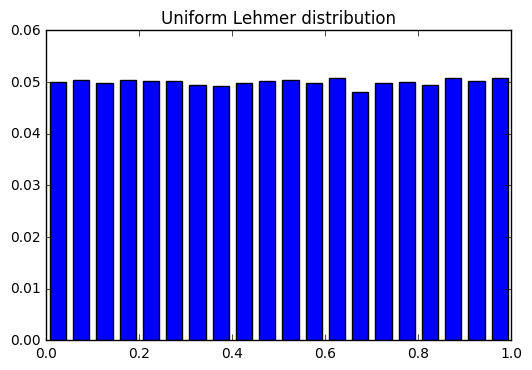

In [71]:
AMOUNT = 100000

random_generator = Lehmer()
seq = [random_generator() for _ in range(AMOUNT)]

display_histogram(seq, 
                  title='Uniform Lehmer distribution',
                  expected_value=calculate_expected_value(seq),
                  variance=calculate_variance(seq))



### Гамма-распределение

                               0
Expected value      5.000000e-03
Variance            5.000000e-09
Standard deviation  7.071068e-05


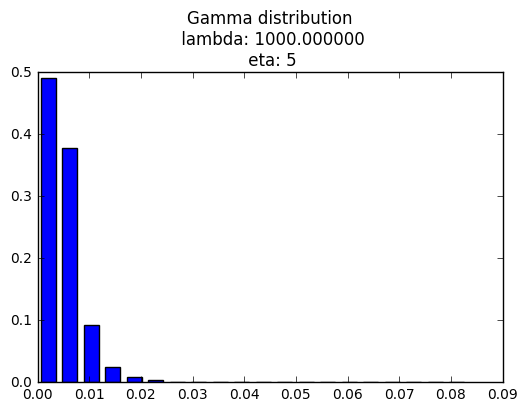

In [72]:
L = 1000
N = 5
AMOUNT = 100000

random_generator = Lehmer()
seq = [gamma_distribution(L, N, random_generator) for _ in range(AMOUNT)]
expected_value = N/L

display_histogram(seq, 
                  title=('Gamma distribution\n lambda: %f\n eta: %d' % (L, N)),
                  expected_value=expected_value,
                  variance=expected_value / (L ** 2))



### Экспоненциальное распределение

                       0
Expected value      0.20
Variance            0.04
Standard deviation  0.20


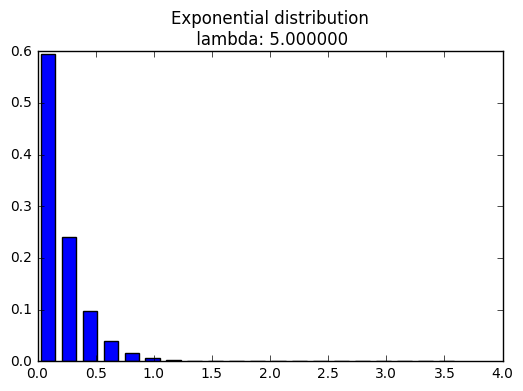

In [73]:
L = 5
AMOUNT = 100000

random_generator = Lehmer()
seq = [exp_distribution(L, random_generator) for _ in range(AMOUNT)]

display_histogram(seq, 
                  title=('Exponential distribution\n lambda: %f' % L),
                  expected_value=1/L, 
                  variance=1/(L**2))


### Гауссовское распределение

                            0
Expected value       5.000000
Variance            10.000000
Standard deviation   3.162278


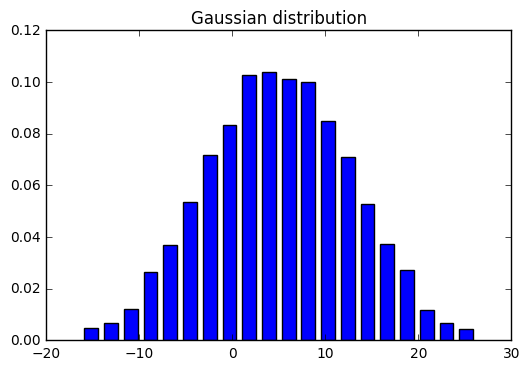

In [74]:
M = 5
S = 5
AMOUNT = 100000

random_generator = Lehmer()
seq = [gauss_distribution(M, S, random_generator) for _ in range(AMOUNT)]

display_histogram(seq,
                  title='Gaussian distribution',
                  expected_value=M,
                  variance=S * 2)


### Распределение Симпсона

                             0
Expected value       86.454073
Variance            221.662492
Standard deviation   14.888334


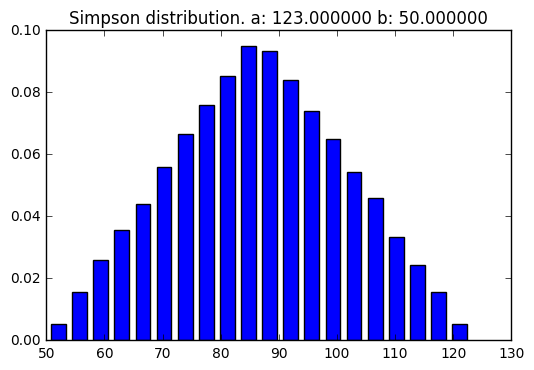

In [75]:
A = 123
B = 50
AMOUNT = 100000

from random import uniform as u
random_generator = Lehmer()
seq = [simpson_distribution(A, B, u) for _ in range(AMOUNT)]

display_histogram(seq,
                  title='Simpson distribution. a: %f b: %f' % (A, B),
                  expected_value=calculate_expected_value(seq),
                  variance=calculate_variance(seq))

### Треугольное распределение

                             0
Expected value       33.073190
Variance            138.243736
Standard deviation   11.757710


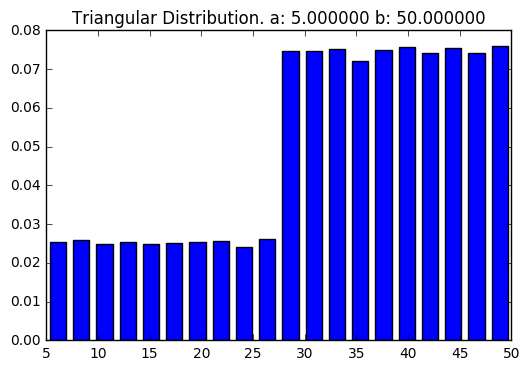

                             0
Expected value       21.890310
Variance            137.920789
Standard deviation   11.743968


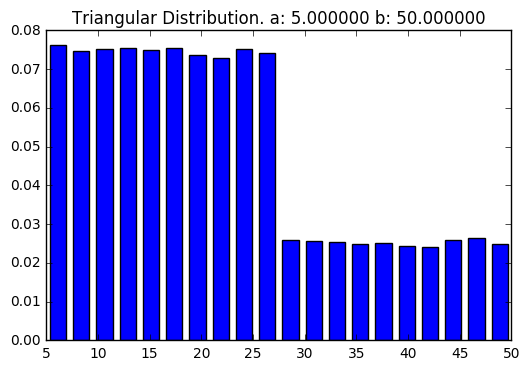

In [76]:
A = 5
B = 50
AMOUNT = 100000

def triangular_distribution(func):
    random_generator = Lehmer()
    
    seq = [func(A, B, random_generator) for _ in range(AMOUNT)]
    display_histogram(seq,
                  title='Triangular Distribution. a: %f b: %f' % (A, B),
                  expected_value=calculate_expected_value(seq),
                  variance=calculate_variance(seq))

triangular_distribution(tri1)
triangular_distribution(tri2)